以下のプログラムは、２次元のダミーのデータを生成しグラフで表したものである。
Xは2次元の座標を表す数値の集まりであり、Yは0もしくは1を表す分類の集合である。

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# 塊を作る関数をインポート
from sklearn.datasets import make_classification
# 乱数の種を0に設定
np.random.seed(0)
# random_state:乱数の種
# n_features:特徴量の数
# n_redundant:冗長なデータの数
# n_informative:目的変数のラベルと相関が強い特徴量の数
# n_clusters_per_class:1クラスのクラスタ数
# n_classes:分類クラス数
# 特徴量の数を 2、塊数を2 に設定してデータセットを生成
X, Y = make_classification(random_state=12,
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=1,
                           n_clusters_per_class=1,
                           n_classes=2)
# グラフの描画
matplotlib.style.use('seaborn-whitegrid')
plt.title("make_classification")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=100, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Prob1
XとYを、学習用・テスト用のデータに7:3の割合で分割しなさい。

In [2]:
from sklearn.model_selection import train_test_split
# データの分割を行う（学習用データ 0.7 テスト用データ 0.3）
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## Prob2
**Prob1**の説明変数のデータを用いて、ランダムフォレストで分類の学習を行いなさい。
なお、その時用いるパラメータは以下の様にすること。
  
**n_estimators** : 10  
**random_state** : 0  

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

## Prob3
**Prob2**の学習結果と、テスト用データを用いて、混同行列を求めなさい。

In [4]:
# X_testの値から予測結果を得る
Y_pred = clf.predict(X_test)
# 混同行列（confusion matrix）
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[14,  0],
       [ 1, 15]], dtype=int64)

## Prob4
**Prob2**の学習結果と、テスト用データを用いて、正解率（accuracy）､適合率(precision)､再現率（recall）、F1スコア（f1_score）を求め、表示しなさい。

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred)))

正解率:0.9666666666666667
適合率:1.0
再現率:0.9375
F1スコア:0.967741935483871


## Prob5
冒頭で示したプログラムに学習結果から得られた等高線を描画して、●の領域と○の領域が分割されている様子を視覚的に確認しなさい。

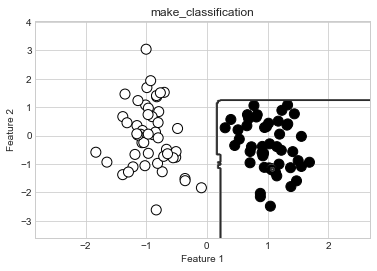

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# 塊を作る関数をインポート
from sklearn.datasets import make_classification
# 乱数の種を0に設定
np.random.seed(0)
# random_state:乱数の種
# n_features:特徴量の数
# n_redundant:冗長なデータの数
# n_informative:目的変数のラベルと相関が強い特徴量の数
# n_clusters_per_class:1クラスのクラスタ数
# n_classes:分類クラス数
# 特徴量の数を 2、塊数を2 に設定してデータセットを生成
X, Y = make_classification(random_state=12,
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=1,
                           n_clusters_per_class=1,
                           n_classes=2)
# グラフの描画
matplotlib.style.use('seaborn-whitegrid')
plt.title("make_classification")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=100, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# 2Dグラフの軸の範囲を決める
x1_min , x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min , x2_max = X[:,1].min()-1, X[:,1].max()+1
# 2Dグラフ上にグリッドポイントを作成する
resolution = 0.02
x1 = np.arange(x1_min,x1_max,resolution)
x2 = np.arange(x2_min,x2_max,resolution)
xx1,xx2 = np.meshgrid(x1,x2)
# グリッドポイント全てに学習モデルを適用
# classifierは学習したモデル
# 各特徴量を1次元配列に変換して予測を実行
Z = clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
#予測結果を元のグリッドポイントのデータサイズに変換
Z = Z.reshape(xx1.shape)
#グリッドポイントの等高線のプロット
plt.contour(xx1,xx2,Z)
plt.show()

## Prob6
グリッドサーチで、以下のパラメータの組み合わせから、RandomForestによる分割の最もよいパラメータの組み合わせを探しなさい。
このとき、使用するパラメータとその数値は以下の様にすること。

**max_depth** : 2,3, None  
**n_estimators** : 5,10,15

なお、学習時に交差検証法で用いる分割数は5とすること。

In [7]:
# グリッドサーチでパラメータを取得
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# サーチするハイパーパラメータのグリッド
param_grid = {"max_depth": [2,3, None],
               "n_estimators":[5,10,15]}

# モデルsvdに作成したグリッド、交差検証戦略は5分化交差検証
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                           param_grid = param_grid,
                           scoring="accuracy",  #metrics
                           cv = 5,              #cross-validation
                           n_jobs = 1)          #number of core
# テストデータと訓練データに分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
#  データを用いてモデル構築
#  cv=5なので訓練用データとテストデータが5分割され交差検証される
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'max_depth': [2, 3, None],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

## Prob7
**Prob6**で得られたベストなハイパーパラメータの一覧を取得しなさい。

In [8]:
# ベストなハイパーパラメータの取得
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 15}

## Prob8
**Prob6**の学習結果から得られる混同行列を求めなさい。

In [9]:
Y_pred = grid_search.predict(X_test)
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[12,  0],
       [ 0, 13]], dtype=int64)

## Prob9
**Prob6**の学習結果と、テスト用データを用いて、正解率（accuracy）､適合率(precision)､再現率（recall）、F1スコア（f1_score）を求め、表示しなさい。

In [10]:
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred)))

正解率:1.0
適合率:1.0
再現率:1.0
F1スコア:1.0
